Inicio - Dataset WeatherAUS.csv

Este dataset contiene 10 años aproximadamente de observaciones diarias del tiempo en Australia.

RainTomorrow es la variable objetivo a predecir. Significa: ¿llovió al día siguiente, sí o no?
Esta columna es "Sí" si la lluvia de ese día fue de 1 mm o más.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [131]:
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", None)
sns.set_style('darkgrid')

# Lectura del dataset

In [132]:
df = pd.read_csv("MaximilianoDominguez_car_prices.csv")
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / tulsa,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [145]:
df['trim'].sort_values(ascending=False).unique()

array(['zx3', 'z06', 'yuk xl 4x2 slt', ..., '& coun fwd', '!', nan],
      dtype=object)

El dataframe contiene datos de precios de autos, precio de venta, marca del auto, modelo y mas informacion. 
Cuenta con 16 columnas y 558,837 filas.

## Descripcion de cada columna y tipo de dato que contiene

- year: Año del modelo del auto (int64) [1982 al 2015]
- make: Marca del auto (object) Ejemplos: ['Aston Martin', 'Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Dodge', 'FIAT','Ferrari','Ford', 'Honda']
- model: Modelo del auto (object) Ejemplos: ['tucson', 'tt', 'thunderbird','taurus', 'tahoe', 'tC', 'sx4', 'swift', 'subrbn','sprinter', 'sportage', 'sonoma']
- trim: Versión del auto (object) 
- body: Tipo de carrocería (object)
- transmission: Tipo de transmisión (object)
- vin: Número de identificación del vehículo (object)
- state: Estado (object)
- condition: Condición del auto (float64)
- odometer: Kilometraje (float64)
- color: Color exterior (object)
- interior: Color interior (object)
- seller: Vendedor (object)
- mmr: Precio promedio de mercado (float64)
- sellingprice: Precio de venta (float64)
- saledate: Fecha de venta (object)

# Estadística descriptiva

In [133]:
df.shape

(558837, 16)

El dataset elegido cuenta con 558837 filas y 16 columnas, de las cuales 11 (once) son variables independientes a analizar y 1 (una) corresponde a la variable target o dependiente

<Figure size 1500x1000 with 0 Axes>

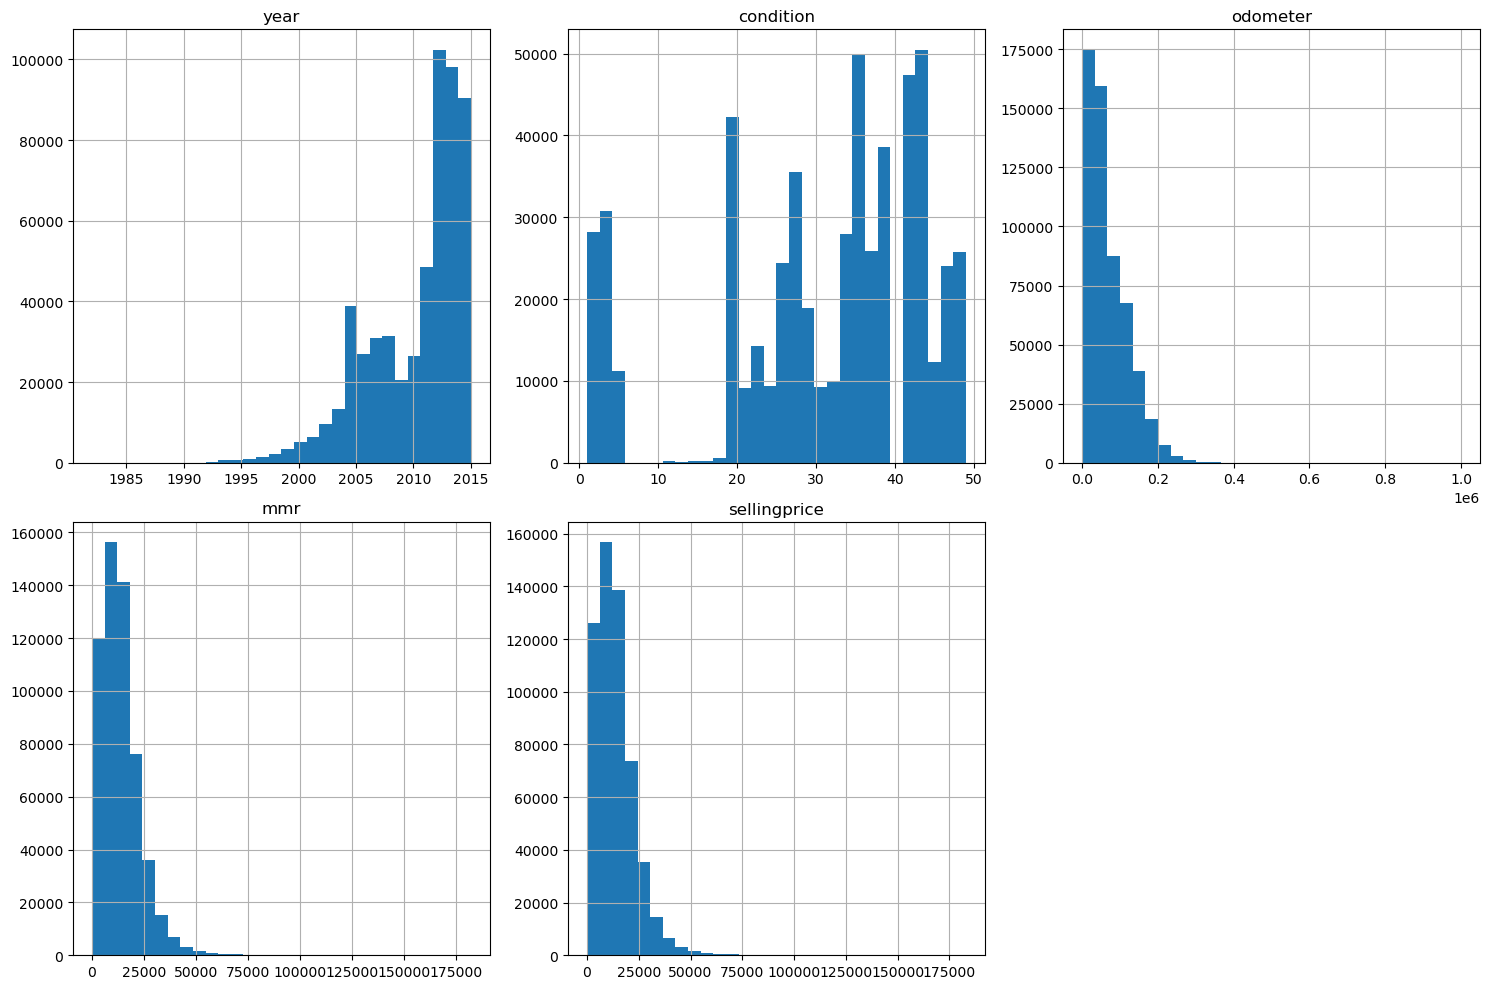

In [119]:
plt.figure(figsize=(15, 10))

# Distribuciones de las variables numéricas
df[['year', 'condition', 'odometer', 'mmr', 'sellingprice']].hist(bins=30, figsize=(15, 10), layout=(2, 3))

# Mostrar graficos
plt.tight_layout()
plt.show()

Analisis de lo visto en los plots:

1) year: La mayoría de los autos en el conjunto de datos son de años recientes.
2) condition: La condición de los autos varía, con algunos autos en excelente estado (condición alta) y otros en condiciones más bajas.
3) odometer: El kilometraje muestra una distribución sesgada a la derecha, indicando que hay más autos con bajos kilometrajes.
4) mmr: El precio promedio de mercado también está sesgado a la derecha, con la mayoría de los autos teniendo un MMR bajo.
5) sellingprice: La distribución del precio de venta es similar a la del MMR, con la mayoría de los autos vendiéndose a precios más bajos.

In [122]:
order_sellingprice = df.sort_values(by='sellingprice', ascending=False)
df_top_sellingprice = order_sellingprice[['make', 'sellingprice']].head(320)

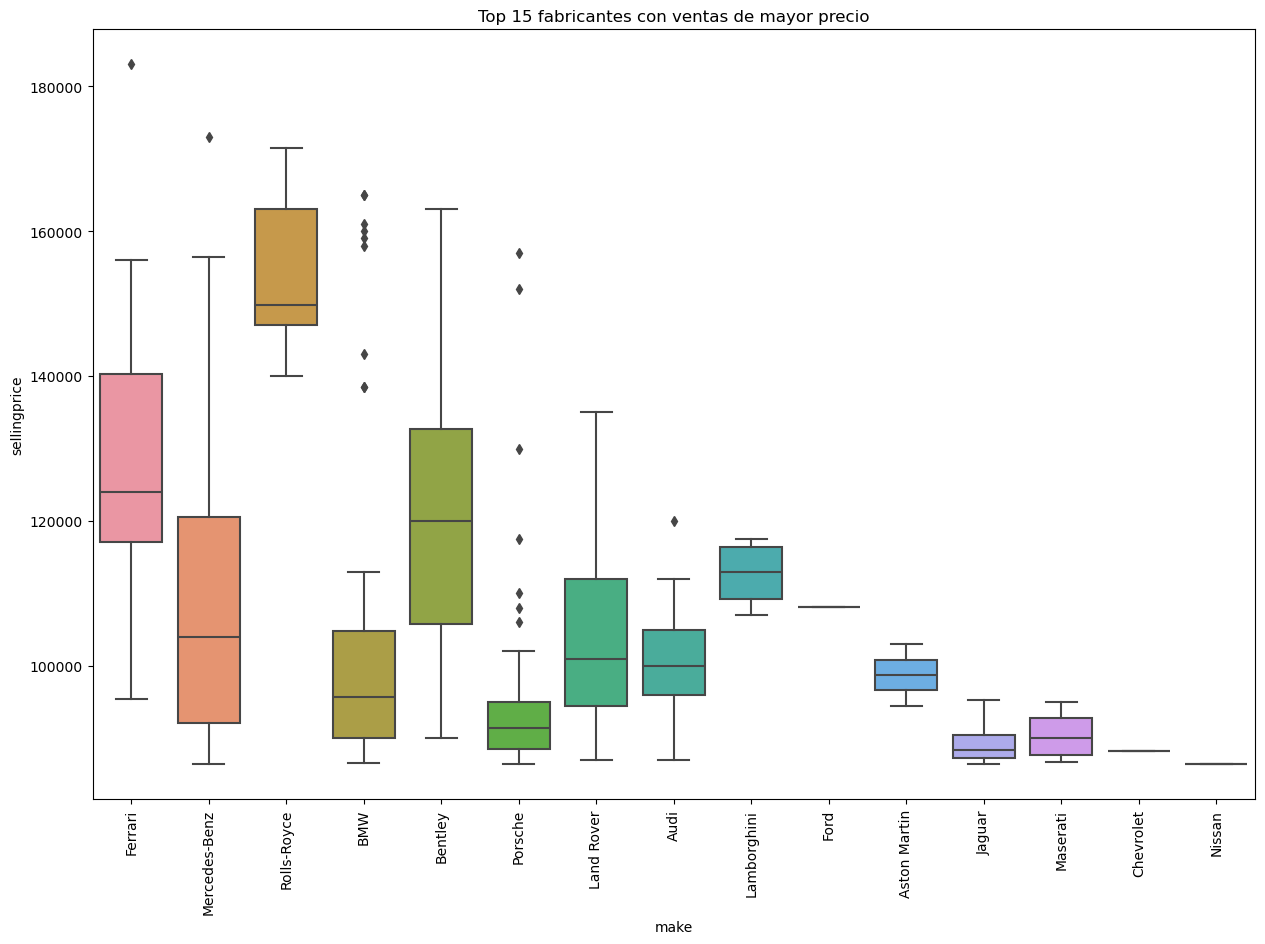

In [123]:
# Boxplot del top 15 precio de venta por marca
plt.figure(figsize=(15, 10))
sns.boxplot(x='make', y='sellingprice', data=df_top_sellingprice)
plt.xticks(rotation=90)
plt.title('Top 15 fabricantes con ventas de mayor precio')
plt.show()

In [126]:
# Filtrando los 15 modelos mas vendidos
top_models = df['model'].value_counts().nlargest(10).index
top_model_data = df[df['model'].isin(top_models)]

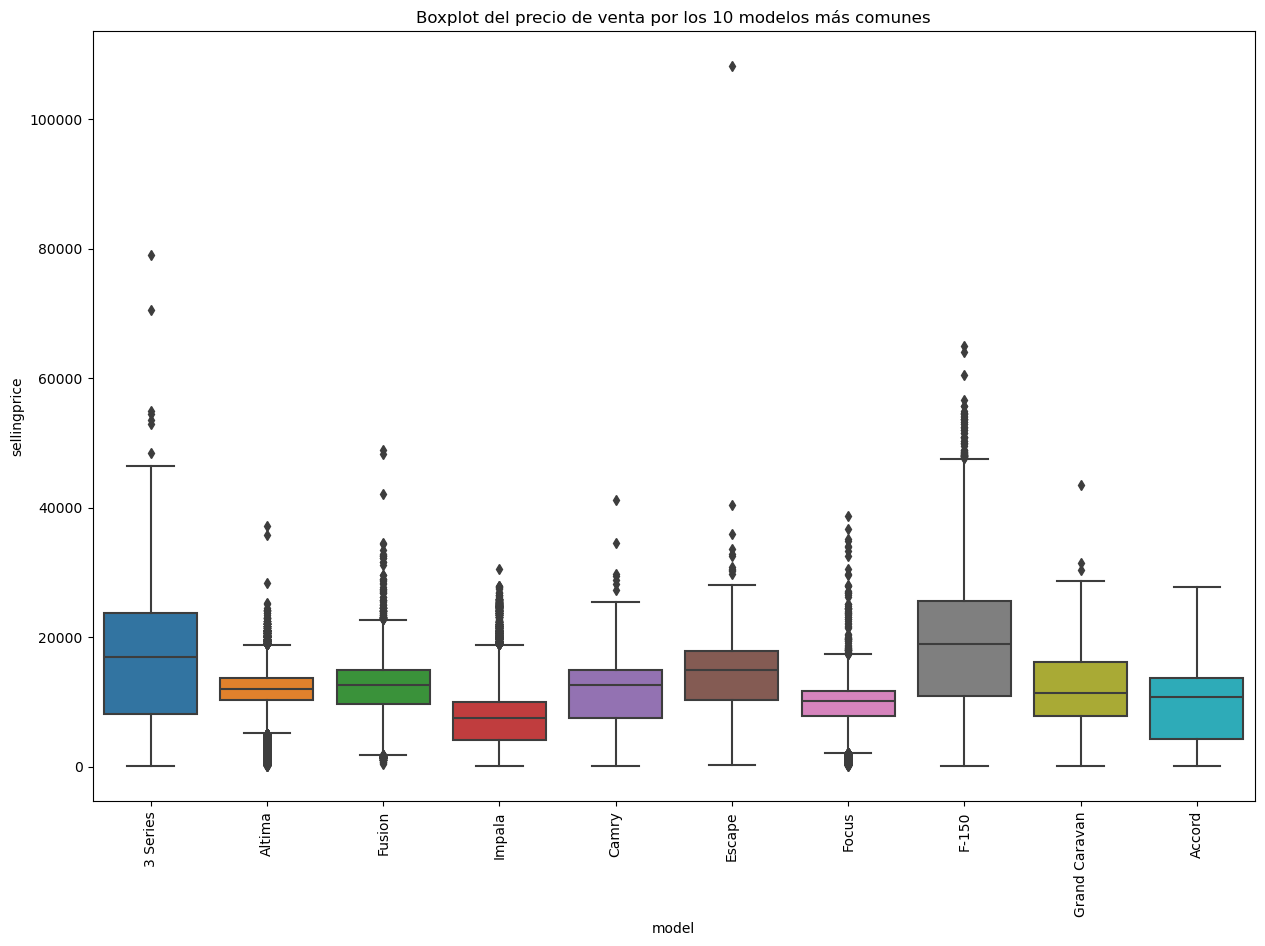

In [127]:
#Boxplot del precio de venta por modelo (mostrando solo los 10 modelos más comunes)
plt.figure(figsize=(15, 10))
sns.boxplot(x='model', y='sellingprice', data=top_model_data)
plt.xticks(rotation=90)
plt.title('Boxplot del precio de venta por los 10 modelos más comunes')
plt.show()

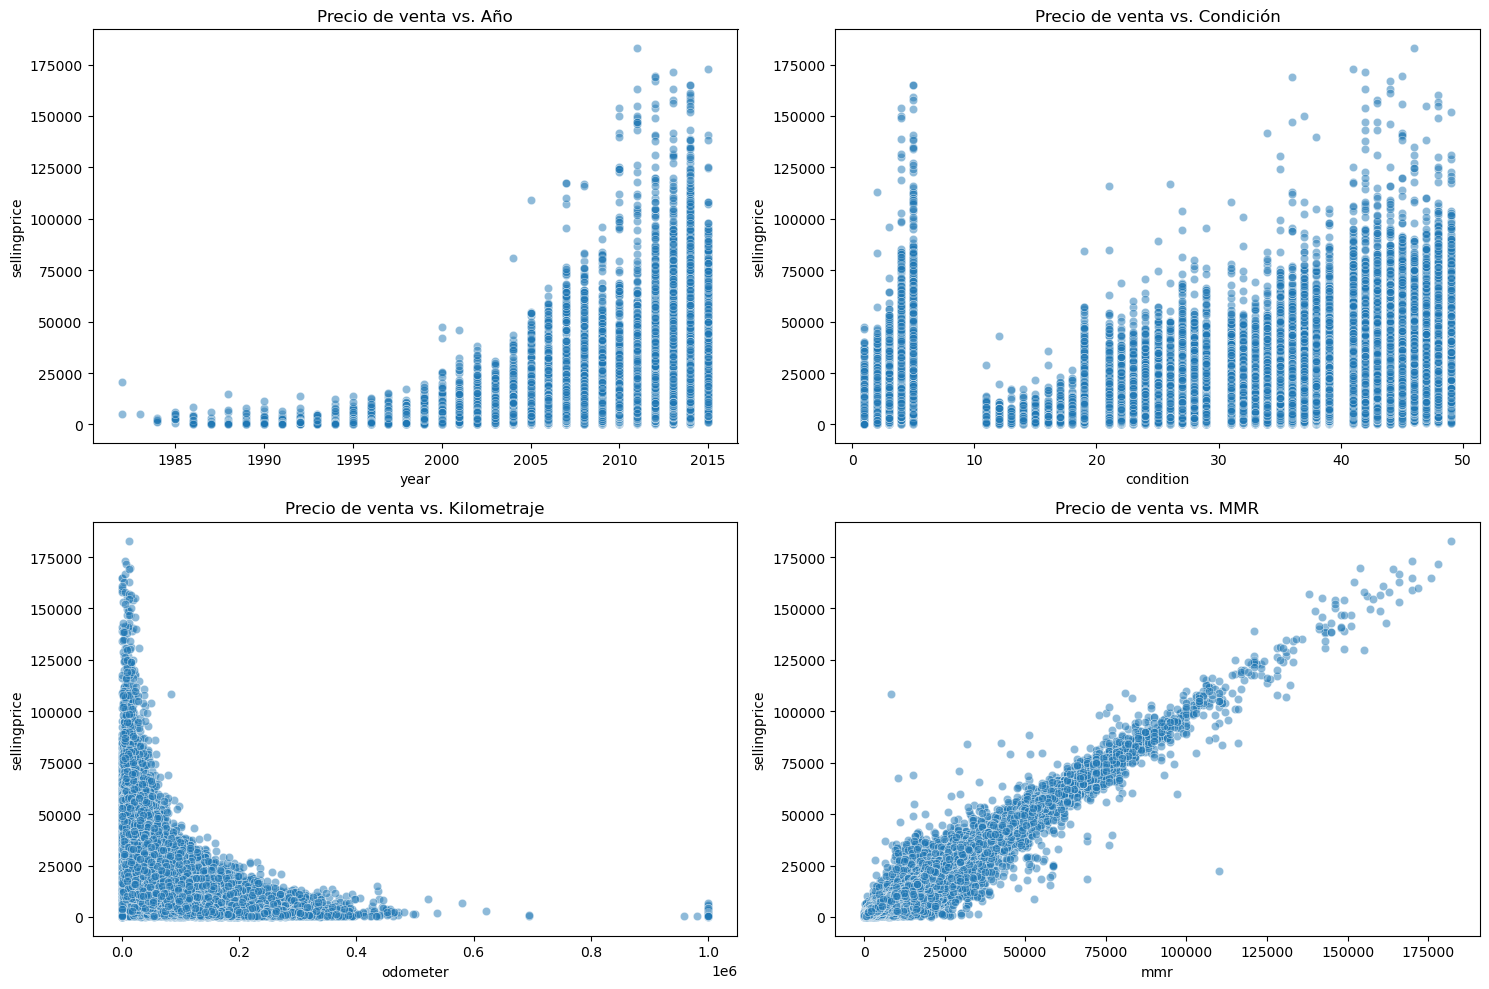

In [129]:
# Scatter plots para visualizar la relación entre el precio de venta y otras variables numéricas
plt.figure(figsize=(15, 10))

# Relación entre el precio de venta y el año
plt.subplot(2, 2, 1)
sns.scatterplot(x='year', y='sellingprice', data=df, alpha=0.5)
plt.title('Precio de venta vs. Año')

# Relación entre el precio de venta y la condición
plt.subplot(2, 2, 2)
sns.scatterplot(x='condition', y='sellingprice', data=df, alpha=0.5)
plt.title('Precio de venta vs. Condición')

# Relación entre el precio de venta y el kilometraje
plt.subplot(2, 2, 3)
sns.scatterplot(x='odometer', y='sellingprice', data=df, alpha=0.5)
plt.title('Precio de venta vs. Kilometraje')

# Relación entre el precio de venta y el MMR
plt.subplot(2, 2, 4)
sns.scatterplot(x='mmr', y='sellingprice', data=df, alpha=0.5)
plt.title('Precio de venta vs. MMR')

plt.tight_layout()
plt.show()